In [9]:
import torch

##1. Compute Gradients in Linear Regression

In [10]:
# Model Parameters
W = torch.ones(size=(1, 5), dtype=torch.float, requires_grad=True)
b = torch.ones(size=(1,), dtype=torch.float, requires_grad=True)

print("W.shape:", W.shape)
print("b.shape:", b.shape)

print("W:", W)
print("b:", b)

W.shape: torch.Size([1, 5])
b.shape: torch.Size([1])
W: tensor([[1., 1., 1., 1., 1.]], requires_grad=True)
b: tensor([1.], requires_grad=True)


In [11]:
# Inputs and Labels
x = torch.tensor([1, 2, 3, 4, 5], dtype=torch.float)
y = torch.tensor([3], dtype=torch.float)

print("x.shape:", x.shape)
print("y.shape:", y.shape)

print("x:", x)
print("y:", y)

x.shape: torch.Size([5])
y.shape: torch.Size([1])
x: tensor([1., 2., 3., 4., 5.])
y: tensor([3.])


In [12]:
# Forward
y_hat = torch.matmul(W, x) + b

print("y_hat.shape:", y_hat.shape)

print("y_hat:", y_hat)

y_hat.shape: torch.Size([1])
y_hat: tensor([16.], grad_fn=<AddBackward0>)


In [13]:
# Loss
loss = (y_hat - y) ** 2

print("loss.shape:", loss.shape)

print("loss:", loss)

loss.shape: torch.Size([1])
loss: tensor([169.], grad_fn=<PowBackward0>)


In [14]:
# Backward
loss.backward()

print("loss.grad:", loss.grad)
print("y_hat.grad:", y_hat.grad)
print("y.grad:", y.grad)

print("W.grad:", W.grad)
print("x.grad:", x.grad)
print("b.grad:", b.grad)

loss.grad: None
y_hat.grad: None
y.grad: None
W.grad: tensor([[ 26.,  52.,  78., 104., 130.]])
x.grad: None
b.grad: tensor([26.])


/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1083: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at  aten/src/ATen/core/TensorBody.h:477.)
  return self._grad


##2. Compute Gradients in Logistic Regression

In [15]:
# Model Parameters
W = torch.ones(size=(3, 5), dtype=torch.float, requires_grad=True)
b = torch.ones(size=(3,), dtype=torch.float, requires_grad=True)

print("W.shape:", W.shape)
print("b.shape:", b.shape)

print("W:", W)
print("b:", b)

W.shape: torch.Size([3, 5])
b.shape: torch.Size([3])
W: tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]], requires_grad=True)
b: tensor([1., 1., 1.], requires_grad=True)


In [16]:
# Inputs and Labels
x = torch.tensor([1, 2, 3, 4, 5], dtype=torch.float)
y = torch.tensor([1, 0, 0], dtype=torch.float)

print("x.shape:", x.shape)
print("y.shape:", y.shape)

print("x:", x)
print("y:", y)

x.shape: torch.Size([5])
y.shape: torch.Size([3])
x: tensor([1., 2., 3., 4., 5.])
y: tensor([1., 0., 0.])


In [17]:
# Softmax Function
def Softmax(z):
    z_exp = torch.exp(z)
    z_exp_sum = torch.sum(z_exp)
    prob = z_exp / z_exp_sum
    return prob

In [18]:
z = torch.tensor([1, 2, 3])
y_hat = Softmax(z)

print("y_hat.shape:", y_hat.shape)
print("y_hat:", y_hat)

y_hat.shape: torch.Size([3])
y_hat: tensor([0.0900, 0.2447, 0.6652])


In [20]:
# Forward
z = torch.matmul(W, x) + b

print("z.shape:", z.shape)
print("z:", z)

y_hat = Softmax(z)

print("y_hat.shape:", y_hat.shape)
print("y_hat:", y_hat)

z.shape: torch.Size([3])
z: tensor([16., 16., 16.], grad_fn=<AddBackward0>)
y_hat.shape: torch.Size([3])
y_hat: tensor([0.3333, 0.3333, 0.3333], grad_fn=<DivBackward0>)


In [22]:
# CrossEntropyLoss
def CrossEntropyLoss(pred, label):
    loss = - torch.log(pred) * label
    return torch.sum(loss)

In [23]:
# Loss
loss = CrossEntropyLoss(y_hat, y)

print("loss.shape:", loss.shape)
print("loss:", loss)

loss.shape: torch.Size([])
loss: tensor(1.0986, grad_fn=<SumBackward0>)


In [24]:
# Backward
loss.backward()

print("loss.grad:", loss.grad)
print("y_hat.grad:", y_hat.grad)
print("y.grad:", y.grad)

print("W.grad:", W.grad)
print("x.grad:", x.grad)
print("b.grad:", b.grad)

loss.grad: None
y_hat.grad: None
y.grad: None
W.grad: tensor([[-0.6667, -1.3333, -2.0000, -2.6667, -3.3333],
        [ 0.3333,  0.6667,  1.0000,  1.3333,  1.6667],
        [ 0.3333,  0.6667,  1.0000,  1.3333,  1.6667]])
x.grad: None
b.grad: tensor([-0.6667,  0.3333,  0.3333])


/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1083: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at  aten/src/ATen/core/TensorBody.h:477.)
  return self._grad


##3. Chain Rule

In [25]:
# Inputs
x = torch.tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=torch.float, requires_grad=True)

In [36]:
# Functions
def f(x):
    return 0.5 * x ** 3 - 3 * x ** 2 - 5 * x + 6

def g(x):
    return -2 * x ** 2 - 5 * x + 10

In [37]:
# Hidden Results
z = f(x)

print("z.shape:", z.shape)
print("z:", z)

z.shape: torch.Size([10])
z: tensor([  6.0000,  -1.5000, -12.0000, -22.5000, -30.0000, -31.5000, -24.0000,
         -4.5000,  30.0000,  82.5000], grad_fn=<AddBackward0>)


In [38]:
# Last Results
y = g(z)

print("y.shape:", y.shape)
print("y:", y)

y.shape: torch.Size([10])
y: tensor([-9.2000e+01,  1.3000e+01, -2.1800e+02, -8.9000e+02, -1.6400e+03,
        -1.8170e+03, -1.0220e+03, -8.0000e+00, -1.9400e+03, -1.4015e+04],
       grad_fn=<AddBackward0>)


In [39]:
# Backward
y.backward(torch.ones(10))

print("y.grad:", y.grad)
print("z.grad:", z.grad)
print("x.grad:", x.grad)

y.grad: None
z.grad: None
x.grad: tensor([   290.0000,    -32.3800,  -1240.9600,  -2873.7400,  -4295.9199,
         -5117.5000,  -5610.8809,  -7128.4600, -12520.2402, -26551.4199])


/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1083: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at  aten/src/ATen/core/TensorBody.h:477.)
  return self._grad


##4. Compute Gradients of Scalar2Scalar

In [40]:
# Input
x = torch.tensor([2], dtype=torch.float, requires_grad=True)

In [43]:
# Function
def f(x):
    return 2 * x ** 2 - 7 * x + 1

In [44]:
# Output
y = f(x)

print("y.shape:", y.shape)
print("y:", y)

y.shape: torch.Size([1])
y: tensor([-5.], grad_fn=<AddBackward0>)


In [45]:
# Backward
y.backward()

print("x.grad:", x.grad)

x.grad: tensor([1.])


##5. Compute Gradients of Vector2Scalar

In [46]:
# Input
x = torch.tensor([1, 3, 2, 7, 5], dtype=torch.float, requires_grad=True)

In [47]:
# Function
def f(x, w):
    return torch.matmul(x, w)

w = torch.ones(5, dtype=torch.float, requires_grad=True)

In [48]:
# Output
y = f(x, w)

print("y.shape:", y.shape)
print("y:", y)

y.shape: torch.Size([])
y: tensor(18., grad_fn=<DotBackward0>)


In [49]:
# Backward
y.backward()

print("x.grad:", x.grad)
print("w.grad:", w.grad)

x.grad: tensor([1., 1., 1., 1., 1.])
w.grad: tensor([1., 3., 2., 7., 5.])


##6. Compute Gradients of Vector2Vector

In [50]:
# Input
x = torch.tensor([2, 5, 3, 7], dtype=torch.float, requires_grad=True)

In [51]:
# Function
def f(x, w):
    return torch.matmul(x, w)

w = torch.ones(4, 4, dtype=torch.float, requires_grad=True)

In [52]:
# Output
y = f(x, w)

print("y.shape:", y.shape)
print("y:", y)

y.shape: torch.Size([4])
y: tensor([17., 17., 17., 17.], grad_fn=<MvBackward0>)


In [53]:
# Backward
y.backward(torch.ones(4))

print("x.grad:", x.grad)
print("w.grad:", w.grad)

x.grad: tensor([4., 4., 4., 4.])
w.grad: tensor([[2., 2., 2., 2.],
        [5., 5., 5., 5.],
        [3., 3., 3., 3.],
        [7., 7., 7., 7.]])


##7. Compute Gradients in Multi-Layer Perceptron with 1 hidden layer

In [54]:
# Input and Output
x = torch.tensor([2, 5, 4], dtype=torch.float)
y = torch.tensor([3, 7], dtype=torch.float)

In [55]:
# Net
def Sigmoid(x):
    return 1 / (1 + torch.exp(-x))

print(Sigmoid(torch.tensor([-10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10])))

class Net:
    def __init__(self):
        self.W_1 = torch.ones(5, 3, dtype=torch.float, requires_grad=True)
        self.b_1 = torch.ones(5, dtype=torch.float, requires_grad=True)
        self.W_2 = torch.ones(2, 5, dtype=torch.float, requires_grad=True)
        self.b_2 = torch.ones(2, dtype=torch.float, requires_grad=True)
        self.activation = Sigmoid
    
    def __call__(self, x):
        h1 = torch.matmul(self.W_1, x) + self.b_1
        z1 = self.activation(h1)
        return torch.matmul(self.W_2, z1) + self.b_2

net = Net()

tensor([4.5398e-05, 3.3535e-04, 2.4726e-03, 1.7986e-02, 1.1920e-01, 5.0000e-01,
        8.8080e-01, 9.8201e-01, 9.9753e-01, 9.9966e-01, 9.9995e-01])


In [56]:
# Output
y_hat = net(x)

print(y_hat.shape)
print(y_hat)

torch.Size([2])
tensor([6.0000, 6.0000], grad_fn=<AddBackward0>)


In [57]:
# Loss
def MSELoss(pred, label):
    loss = (pred - label) ** 2
    return torch.sum(loss)

loss = MSELoss(y_hat, y)

print(loss.shape)
print(loss)

torch.Size([])
tensor(9.9999, grad_fn=<SumBackward0>)


In [58]:
# Backward
loss.backward()

print(net.W_1.grad)
print(net.W_2.grad)

tensor([[4.9152e-05, 1.2288e-04, 9.8303e-05],
        [4.9152e-05, 1.2288e-04, 9.8303e-05],
        [4.9152e-05, 1.2288e-04, 9.8303e-05],
        [4.9152e-05, 1.2288e-04, 9.8303e-05],
        [4.9152e-05, 1.2288e-04, 9.8303e-05]])
tensor([[ 5.9999,  5.9999,  5.9999,  5.9999,  5.9999],
        [-2.0000, -2.0000, -2.0000, -2.0000, -2.0000]])


##8. Stochastic Gradient Descent

In [59]:
from torchvision.transforms import Lambda

In [150]:
# Inputs and Labels
n_samples = 10000

x = torch.rand(size=(n_samples, 3)).mul_(10)
print(x.shape)

def hyperplane1(x):
    return x[1] - 2 * x[2] + 10

def hyperplane2(x):
    return  2 * x[0] + x[1] - 2 * x[2] - 10

def classify(x):
    if hyperplane2(x) > 0:
        return 0
    elif hyperplane1(x) > 0:
        return 1
    else:
        return 2

y = torch.tensor([classify(x_) for x_ in x])

target_transform = Lambda(lambda y: torch.zeros(3, dtype=torch.float).scatter_(dim=0, index=y, value=1))
y_one_hot = torch.stack([target_transform(y_) for y_ in y])

print(y.shape)
print(y_one_hot.shape)

torch.Size([10000, 3])
torch.Size([10000])
torch.Size([10000, 3])


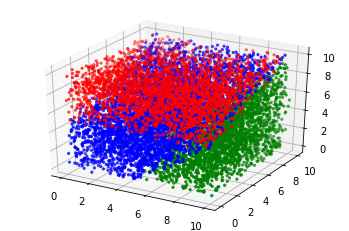

In [151]:
# Graphic
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

x_np = x[:, 0].detach().numpy()
y_np = x[:, 1].detach().numpy()
z_np = x[:, 2].detach().numpy()

y_np_ = y.detach().numpy()

cluster_0 = np.where(y_np_==0)
cluster_1 = np.where(y_np_==1)
cluster_2 = np.where(y_np_==2)

x_np_0 = x_np[cluster_0]
y_np_0 = y_np[cluster_0]
z_np_0 = z_np[cluster_0]

x_np_1 = x_np[cluster_1]
y_np_1 = y_np[cluster_1]
z_np_1 = z_np[cluster_1]

x_np_2 = x_np[cluster_2]
y_np_2 = y_np[cluster_2]
z_np_2 = z_np[cluster_2]

fig = plt.figure()

ax = fig.gca(projection='3d')

ax.scatter(x_np_0, y_np_0, z_np_0, marker='o', s=5, c='green')
ax.scatter(x_np_1, y_np_1, z_np_1, marker='o', s=5, c='blue')
ax.scatter(x_np_2, y_np_2, z_np_2, marker='o', s=5, c='red')

plt.show()

In [152]:
# Neural Network
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.params = {
            'W1' : torch.rand(input_size, hidden_size, dtype=torch.float, requires_grad=True),
            'b1' : torch.rand(hidden_size, dtype=torch.float, requires_grad=True),
            'W2' : torch.rand(hidden_size, output_size, dtype=torch.float, requires_grad=True),
            'b2' : torch.rand(output_size, dtype=torch.float, requires_grad=True),
        }
        
        self.activation = torch.nn.ReLU()

    def __call__(self, x):
        z = torch.matmul(x, self.params['W1']) + self.params['b1']
        h = self.activation(z)
        return torch.matmul(h, self.params['W2']) + self.params['b2']

net = NeuralNetwork(
    input_size=3,
    hidden_size=5,
    output_size=3
)

In [153]:
# Softmax Function
def Softmax(z):
    z_exp = torch.exp(z)
    z_exp_sum = torch.sum(z_exp)
    prob = z_exp / z_exp_sum
    return prob

In [154]:
# CrossEntropyLoss
def CrossEntropyLoss(pred, label):
    N = label.shape[0]
    loss = - torch.log(pred) * label
    return torch.sum(loss) / N

In [157]:
epochs = 20
lr = 1e-3

for epoch in range(epochs):
    print(f"Epoch {epoch + 1} ==============================")

    y_hat = net(x)
    y_pred = Softmax(y_hat)

    loss = CrossEntropyLoss(y_pred, y_one_hot)

    print(f"Loss : {loss.item()}")

    loss.backward()

    for key in net.params.keys():
        net.params[key] = net.params[key] - lr * net.params[key].grad
    
    for key in net.params.keys():
        net.params[key].detach_()
        net.params[key].requires_grad = True

Epoch 1 ==============================
Loss : 12.147894859313965
Epoch 2 ==============================
Loss : 12.10846996307373
Epoch 3 ==============================
Loss : 12.069636344909668
Epoch 4 ==============================
Loss : 12.031410217285156
Epoch 5 ==============================
Loss : 11.993797302246094
Epoch 6 ==============================
Loss : 11.956778526306152
Epoch 7 ==============================
Loss : 11.920333862304688
Epoch 8 ==============================
Loss : 11.884455680847168
Epoch 9 ==============================
Loss : 11.849153518676758
Epoch 10 ==============================
Loss : 11.814410209655762
Epoch 11 ==============================
Loss : 11.7802152633667
Epoch 12 ==============================
Loss : 11.746572494506836
Epoch 13 ==============================
Loss : 11.713489532470703
Epoch 14 ==============================
Loss : 11.680953025817871
Epoch 15 ==============================
Loss : 11.648975372314453
Epoch 16 =============

In [ ]:
y_hat = net(x)
y_pred = Softmax(y_hat)

loss = CrossEntropyLoss(y_pred, y_one_hot)
loss.backward()